In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sys
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [21]:
source_folder = "C:\\Users\\18503\\Dropbox\\Course\\Applied Machine Learning\\Homework\\hw2"

In [22]:
os.listdir(source_folder)

['.ipynb_checkpoints',
 'abalone.csv',
 'Hw02.pdf',
 'hw2_pankaj.docx',
 'hw2_pankaj.ipynb',
 '~$2_pankaj.docx']

In [23]:
dataset = np.genfromtxt(os.path.join(source_folder,'abalone.csv'),delimiter=',')
dataset.shape

(4177, 8)

# Part 1

In [24]:
LAMBDA = 0.0001

In [25]:
def ols():
    train_error = []
    test_error  = []

    for i in range(10):
        train,test   = train_test_split(dataset,test_size=0.2)
        train_labels,test_labels = train[:,-1].reshape(-1,1),test[:,-1].reshape(-1,1)
        train,test        = train[:,0:7],test[:,0:7]
        N_train,p         = train.shape
        N_test            = test.shape[0]
        train,test        = np.hstack((np.ones((N_train,1)),train)),np.hstack((np.ones((N_test,1)),test))

        beta = np.dot(np.linalg.inv(np.dot(train.T,train) + LAMBDA*(np.eye(p+1))),np.dot(train.T,train_labels))
        predicted_train_labels,predicted_test_labels = np.dot(train,beta),np.dot(test,beta)
        train_error.append(r2_score(train_labels,predicted_train_labels))
        test_error.append(r2_score(test_labels,predicted_test_labels))

    print("Avg training_error %f " %(sum(train_error)/10))
    print("Avg test_error %f" %(sum(test_error)/10))

In [26]:
ols()

Avg training_error 0.525926 
Avg test_error 0.528256


# Part 2

In [34]:
def Train_tree(depth):
    
    Train_error = []
    Test_eror   = []
    
    for i in range(1,depth+1):
        
        train,test   = train_test_split(dataset,test_size=0.2)
        train_labels,test_labels = train[:,-1].reshape(-1,1),test[:,-1].reshape(-1,1)
        train,test        = train[:,0:7],test[:,0:7]
        
        Tree = DecisionTreeRegressor(max_depth = i,random_state=1)
        Tree.fit(train,train_labels)

        predictied_train_labels = Tree.predict(train)
        Train_error.append(r2_score(train_labels,predictied_train_labels))

        predictied_test_labels  = Tree.predict(test)
        Test_eror.append(r2_score(test_labels,predictied_test_labels))

    Depth = np.linspace(1,depth,depth)
    plt.plot(Depth,Train_error,label = 'R2 Training')
    plt.plot(Depth,Test_eror,label = 'R2 Testing')
    plt.xlabel("Depth")
    plt.ylabel("R2")
    plt.title("Regression Tree error")
    plt.legend()
    plt.show()
    df = pd.DataFrame(np.array(list(zip(Train_error,Test_eror))),columns=["Train error","Test Error"])
    df.index = [i for i in range(1,depth+1)]
    df.index.name = 'depth'
    return df

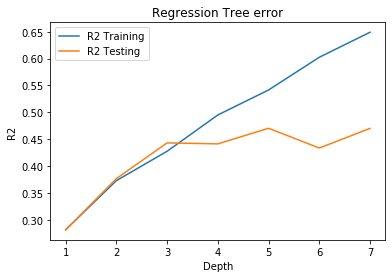

,Train error,Test Error
depth,,
1,0.281431,0.281007
2,0.372868,0.376649
3,0.427515,0.443095
4,0.495100,0.441262
5,0.541672,0.470334
6,0.602595,0.433511
7,0.649172,0.470083


In [35]:
Train_tree(7)

# Part 3

In [36]:
def Train_forest():
    Train_error = []
    Test_eror   = []
    
    k = [10,100,300]
    
    for i in k:
        
        train,test   = train_test_split(dataset,test_size=0.2)
        train_labels,test_labels = train[:,-1].reshape(-1,1),test[:,-1].reshape(-1,1)
        train,test        = train[:,0:7],test[:,0:7]
        
        forest = RandomForestRegressor(n_estimators = i,max_features='auto')
        forest.fit(train,train_labels)

        predictied_train_labels = forest.predict(train)
        Train_error.append(r2_score(train_labels,predictied_train_labels))

        predictied_test_labels  = forest.predict(test)
        Test_eror.append(r2_score(test_labels,predictied_test_labels))

   
    plt.xticks(np.linspace(0,len(k)-1,len(k)),k) 
    plt.plot(Train_error,label = 'Training error')
    plt.plot(Test_eror,label = 'Testing error')
    plt.xlabel("K")
    plt.ylabel("R2")
    plt.legend()
    plt.show()
    df = pd.DataFrame(np.array(list(zip(Train_error,Test_eror))),columns=["Train error","Test Error"])
    df.index = k
    df.index.name = 'k'
    
    return df


C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\18503\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


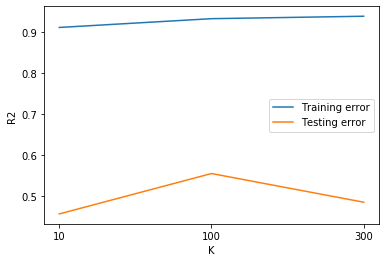

,Train error,Test Error
k,,
10,0.911681,0.457500
100,0.933051,0.555884
300,0.938984,0.486040


In [37]:
Train_forest()

In [3]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
np.multiply(a,b)

array([ 4, 10, 18])